In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# file path
file_path = "~/buckets/b1/exp/HT4220D/HT4220E.txt"

In [4]:
# load data
df = pl.read_csv(file_path, separator='\t', ignore_errors=True)
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
str,str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
"""20240923 145403""","""binary""","""custom""",true,true,false,-100,31,71,true,173249,0.176292,1179,0.817631,5196,0.742266,40,51.866456,48.999191,10488,55065000,1
"""20240923 145421""","""binary""","""custom""",true,true,false,-100,31,22,true,173249,0.085849,1121,0.825634,7536,0.801205,24,78.647178,42.692531,7927,51705000,2
"""20240923 145443""","""binary""","""custom""",true,true,false,-100,31,121,true,173249,0.234583,2184,0.623822,6003,0.766027,30,28.073377,55.018186,9917,54855000,3
"""20240923 145519""","""binary""","""custom""",true,true,false,-100,31,115,true,173249,0.075956,132,0.585832,1081,0.902643,25,63.55903,83.923986,9673,54870000,4
"""20240923 145636""","""binary""","""custom""",true,true,false,-100,31,356,true,173249,0.021618,1456,0.62791,6604,0.706525,22,42.493406,69.226612,13145,54885000,5


In [5]:
# convert 'fecha' to datetime
df = df.with_columns(pl.col('fecha').str.strptime(pl.Datetime, "%Y%m%d %H%M%S"))
df.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 14:54:03,"""binary""","""custom""",true,true,false,-100,31,71,true,173249,0.176292,1179,0.817631,5196,0.742266,40,51.866456,48.999191,10488,55065000,1
2024-09-23 14:54:21,"""binary""","""custom""",true,true,false,-100,31,22,true,173249,0.085849,1121,0.825634,7536,0.801205,24,78.647178,42.692531,7927,51705000,2
2024-09-23 14:54:43,"""binary""","""custom""",true,true,false,-100,31,121,true,173249,0.234583,2184,0.623822,6003,0.766027,30,28.073377,55.018186,9917,54855000,3
2024-09-23 14:55:19,"""binary""","""custom""",true,true,false,-100,31,115,true,173249,0.075956,132,0.585832,1081,0.902643,25,63.55903,83.923986,9673,54870000,4
2024-09-23 14:56:36,"""binary""","""custom""",true,true,false,-100,31,356,true,173249,0.021618,1456,0.62791,6604,0.706525,22,42.493406,69.226612,13145,54885000,5


In [6]:
# calculate runtime
runtime = round((df['fecha'].max() - df['fecha'].min()).total_seconds()/60/60,2)
runtime

7.61

In [7]:
# sort by 'ganancia' in descending order
df_sorted = df.sort('ganancia', descending=True).filter(pl.col('ganancia').is_not_null())
df_sorted.head()

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 19:39:09,"""binary""","""custom""",true,true,false,-100,31,644,true,173249,0.042147,2824,0.561448,84,0.989664,18,0.051212,99.377821,12204,63840000,87
2024-09-23 17:40:46,"""binary""","""custom""",true,true,false,-100,31,516,true,173249,0.041028,749,0.626159,122,0.999705,4,0.624341,97.165457,11226,63645000,77
2024-09-23 15:53:48,"""binary""","""custom""",true,true,false,-100,31,366,true,173249,0.065087,862,0.839746,41,0.998503,11,1.51801,69.244345,11125,63465000,45
2024-09-23 15:21:46,"""binary""","""custom""",true,true,false,-100,31,649,true,173249,0.029398,1072,0.785773,70,0.966146,9,0.073559,53.825031,10840,63120000,40
2024-09-23 22:21:28,"""binary""","""custom""",true,true,false,-100,31,437,true,173249,0.059547,2673,0.563289,36,0.996875,24,1.361275,99.924724,11586,63045000,126


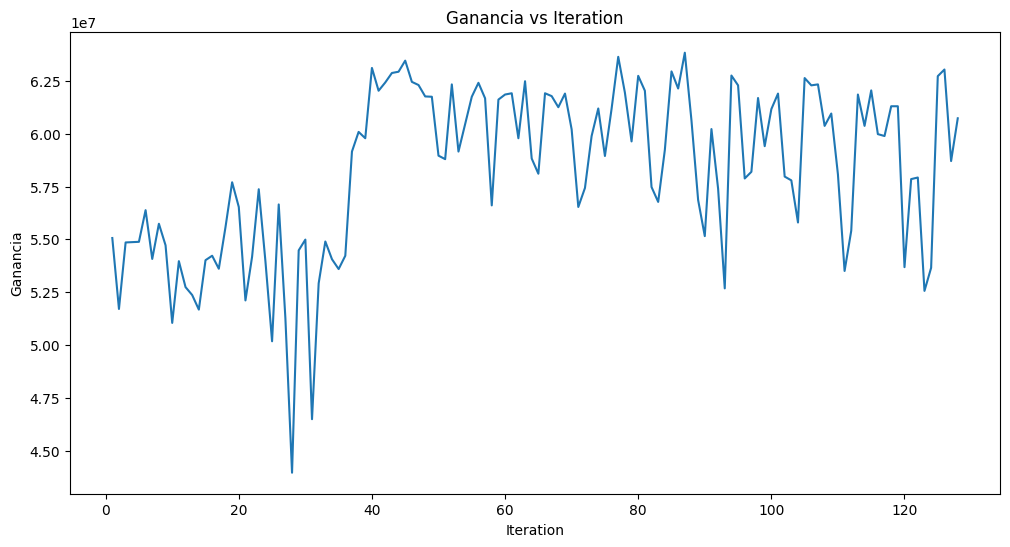

In [8]:
# plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['iteracion'], y=df['ganancia'])
plt.title('Ganancia vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Ganancia')
plt.show()

In [9]:
# Find the row with the best ganancia
best_params = df_sorted.head(1).tail(1)
best_params

fecha,objective,metric,first_metric_only,boost_from_average,feature_pre_filter,verbosity,max_bin,num_iterations,force_row_wise,seed,learning_rate,num_leaves,feature_fraction,min_data_in_leaf,bagging_fraction,bagging_freq,lambda_l1,lambda_l2,envios,ganancia,iteracion
datetime[μs],str,str,bool,bool,bool,i64,i64,i64,bool,i64,f64,i64,f64,i64,f64,i64,f64,f64,i64,i64,i64
2024-09-23 19:39:09,"""binary""","""custom""",true,true,false,-100,31,644,true,173249,0.042147,2824,0.561448,84,0.989664,18,0.051212,99.377821,12204,63840000,87


In [10]:
# List of all parameters we searched through
params = [
    'learning_rate', 'num_leaves', 'feature_fraction', 'min_data_in_leaf',
    'max_depth', 'lambda_l1', 'lambda_l2', 'bagging_fraction', 'bagging_freq',
    'min_child_samples', 'min_gain_to_split', 'subsample', 'colsample_bytree',
    'min_child_weight', 'max_cat_threshold', 'cat_l2', 'cat_smooth', 'min_data_per_group'
]

# Generate R code for the best parameters
r_code = "# Best hyperparameters\n"
for param in params:
    if param in best_params.columns:
        value = best_params[param][0]
        if isinstance(value, float):
            r_code += f"PARAM$finalmodel${param} <- {value:.6f}\n"
        elif isinstance(value, int):
            r_code += f"PARAM$finalmodel${param} <- {value}L\n"
        else:
            r_code += f"PARAM$finalmodel${param} <- {value}\n"
    else:
        r_code += f"# Warning: {param} not found in the results\n"

In [12]:
print(r_code)

# Best hyperparameters
PARAM$finalmodel$learning_rate <- 0.042147
PARAM$finalmodel$num_leaves <- 2824L
PARAM$finalmodel$feature_fraction <- 0.561448
PARAM$finalmodel$min_data_in_leaf <- 84L
# Warning: max_depth not found in the results
PARAM$finalmodel$lambda_l1 <- 0.051212
PARAM$finalmodel$lambda_l2 <- 99.377821
PARAM$finalmodel$bagging_fraction <- 0.989664
PARAM$finalmodel$bagging_freq <- 18L
# Warning: min_child_samples not found in the results
# Warning: min_gain_to_split not found in the results
# Warning: subsample not found in the results
# Warning: colsample_bytree not found in the results
# Warning: min_child_weight not found in the results
# Warning: max_cat_threshold not found in the results
# Warning: cat_l2 not found in the results
# Warning: cat_smooth not found in the results
# Warning: min_data_per_group not found in the results

